In [96]:
import numpy as np
import nltk
import string
import random

In [97]:
f = open(r"E:\portfolio\ai_chatbot\data\data.txt","r",errors='ignore')
raw_doc = f.read()


In [98]:
raw_doc = raw_doc.lower()
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
sentence_tokens = nltk.sent_tokenize(raw_doc)
word_tokens=nltk.word_tokenize(raw_doc)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [99]:
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punc_dict = dict((ord(punct),None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punc_dict)))

In [100]:
greet_inputs = ["Hello","Moin","Hola","Hi","Halo","Helo"]
greet_responses = ["Hello","Moin","Hola","Hi","Halo","Helo"]
def greet(sentence):
    for words in sentence.split():
        if words.lower() in greet_inputs:
            return random.choice(greet_responses)
    
    

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [102]:
def response(user_response):
    robo1_response=''
    TfIdfVec = TfidfVectorizer(tokenizer=LemNormalize,stop_words='english')
    tfidf = TfIdfVec.fit_transform(sentence_tokens)
    vals=cosine_similarity(tfidf[-1],tfidf)
    idx=vals.argsort()[0][-2]
    flat=vals.flatten()
    flat.sort()
    req_tfidf=flat[-2]
    print(flat[-2])
    if (req_tfidf == 0):
        robo1_response=robo1_response+"I am sorry unable to understand you ..."
    else:
        robo1_response=robo1_response+sentence_tokens[idx]
        return robo1_response

In [ ]:
flag=True
print("Hi I am a test bot , start typing your text after greeting me to start chatting, end the convo by saying bye")
while(flag == True):
    user_response = input()
    user_response = user_response.lower()
    if(user_response!='bye'):
        if (user_response=="thank you" or user_response=="thanks"):
            flag=False
            print("Bot : You are welcome")
        else:
            if(greet(user_response) != None):
                print(greet(user_response))
                print("Bot :"+ greet(user_response))
            else:
                sentence_tokens.append(user_response)
                word_tokens = word_tokens + nltk.word_tokenize(user_response)
                final__words = list(set(word_tokens))
                print('Bots :',end='')
                print(response(user_response))
                sentence_tokens.remove(user_response)
    else:
        flag=False
        print("Goodbye")

In [113]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
centers = [[0, 0], [5, 5], [0, 2]]
X, _ = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)


In [116]:
X[0:20]

array([[-0.15977961,  0.14802236],
       [ 4.84525166,  4.7958829 ],
       [-0.32136387, -0.27581991],
       [-0.54921702,  1.5729032 ],
       [ 0.49211627,  0.48095194],
       [ 5.01805361,  5.93584992],
       [ 4.97656538,  4.87298276],
       [-0.06488738,  2.30777207],
       [ 0.45065437, -0.4319726 ],
       [ 0.37976832,  0.0350205 ],
       [ 5.06557143,  5.03852854],
       [ 5.02983456,  4.56916037],
       [ 5.23595193,  4.85445648],
       [ 0.5234675 ,  1.98968058],
       [ 5.5143936 ,  4.39720064],
       [-0.46247297,  0.31247924],
       [ 4.8430444 ,  3.78154278],
       [ 5.37636705,  5.16208163],
       [-1.19784514,  2.35237502],
       [-0.21979942,  1.56057171]])

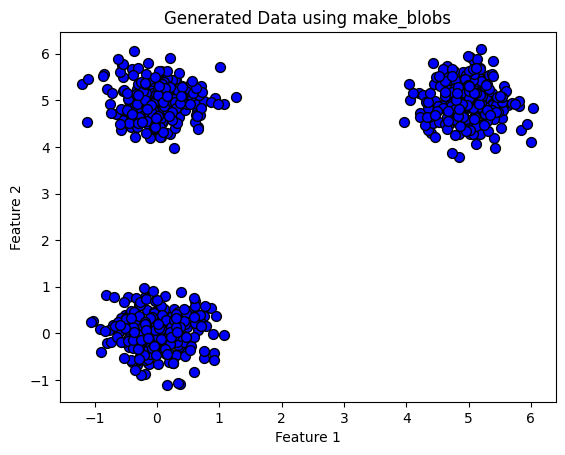

In [117]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Define centers for the blobs
centers = [[0, 0], [5, 5], [0, 5]]

# Generate synthetic data
X, _ = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.title('Generated Data using make_blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


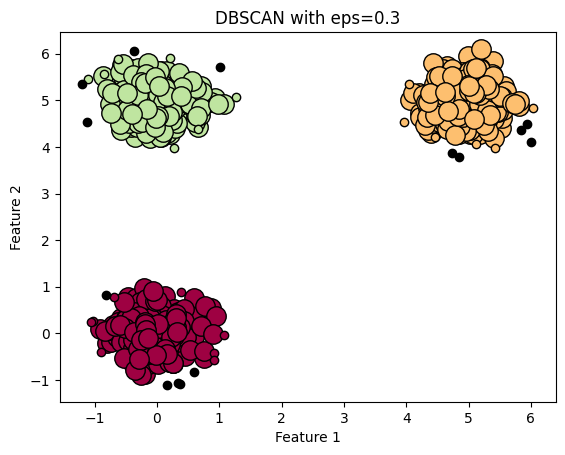

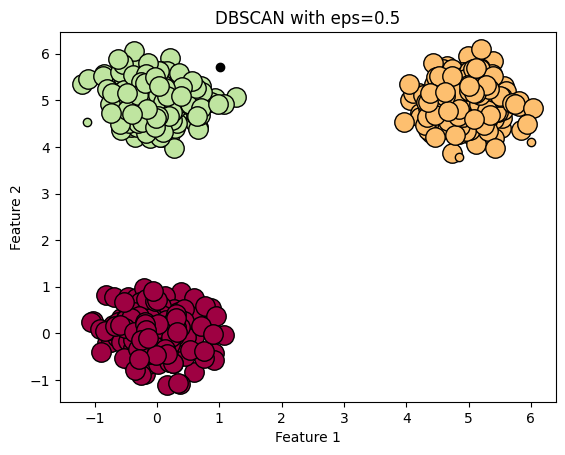

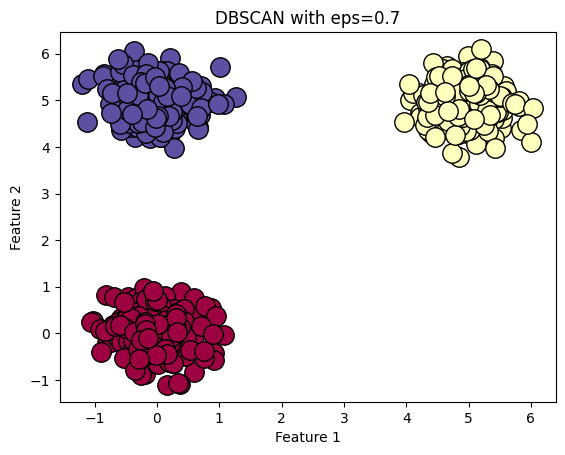

In [118]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Define centers for the blobs
centers = [[0, 0], [5, 5], [0, 5]]

# Generate synthetic data
X, _ = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

# Function to plot DBSCAN results
def plot_dbscan(X, eps):
    db = DBSCAN(eps=eps, min_samples=5).fit(X)
    labels = db.labels_
    # Core samples are marked as True, outliers as False
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    # Plot results
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
    plt.title(f'DBSCAN with eps={eps}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot DBSCAN results with different eps values
plot_dbscan(X, eps=0.3)
plot_dbscan(X, eps=0.5)
plot_dbscan(X, eps=0.7)
